# Exploring MNIST And Deep Neural Networks

This Jupyter Notebook is a companion to ([this article](https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3)), if you found this document some other way and feel you're missing some context, you might wish to read the article. The purpose of this document is to help you learn about deep neural networks and explore how changing the architecture of a neural network impacts the performance of the network.  

Before we can build any neural networks we need to import a few things from Keras and prepare our data. The following code extracts the MNIST dataset, provided by Keras, and flattens the 28x28 pixel images into a vector with length 784. Additionally, it modifies the labels from a numeric value 0-9 to a one-hot encoded vector.

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0], image_size)

print(x_train.shape)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60000, 784)


In [ ]:
import numpy as np
print(np.shape(x_train))
print(np.shape(y_train))

(60000, 784)
(60000, 10)


## A Look At Some Random Digits

It's a good idea to get a sense of the dataset we're working with. Run this code multple times to see new randomly selected digits from the training set.

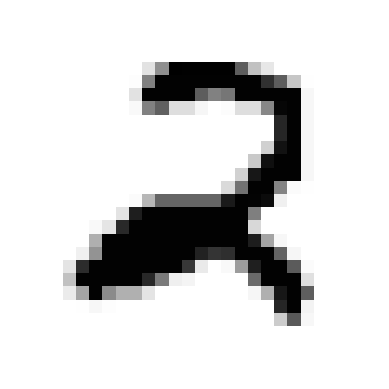

In [ ]:
for i in range(1):
    ax = plt.subplot(1, 1, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## First Network

Here is a first, simple network, to solve MNIST. It has a single hidden layer with 32 nodes.

In [ ]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()
model.output

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: The layer sequential_5 has never been called and thus has no defined output.

## Train & Evaluate The Network

This code trains and evaluates the model we defined above. It also uses `matplotlib` and the history object provided by Keras, which tracks how the model behaves through it's training. The history object is worth exploring further, here we are using it to plot training and validation accuracy over time.

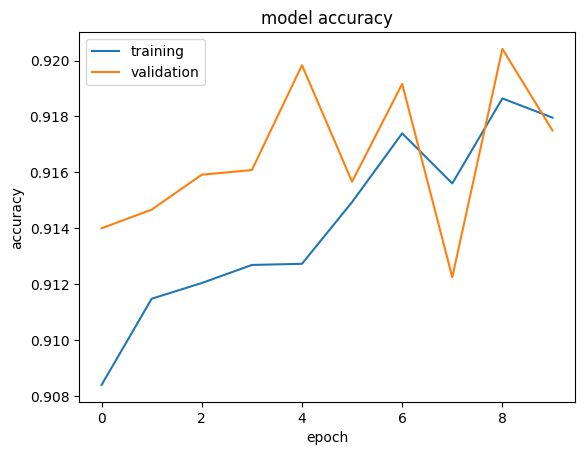

Test loss: 0.282
Test accuracy: 0.916


In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False, validation_split=.2)

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Now we visually see the results

10000
Random picture 87 in testing set, which has 10000 pictures
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.0946317e-03 1.1878887e-03 3.3914784e-04 8.4400660e-01 1.2874277e-04
  1.4064828e-01 1.5375258e-04 2.7558724e-03 5.2273483e-03 4.4575492e-03]]
The predicted digit is 3


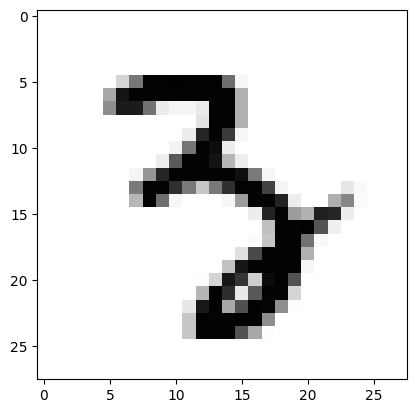

In [ ]:
import numpy as np
print(len(x_test))
k= randint(0,len(x_test))
print(f"Random picture", k, "in testing set, which has", len(x_test), "pictures" )
aaa=x_test[k:k+1,:]
plt.imshow(aaa.reshape(28,28), cmap='Greys')
a=model.predict(aaa)
print(a)
print(f"The predicted digit is", a[0,:].argmax())

# most of the predictions should be correct, except a few, say k=6495, 3139,

In [ ]:
# testing own digits

#load image
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:

#check image and prepare data to 1D vecotor of 1x784
test1=plt.imread("resized8enhanced.bmp")
print(test1.shape)


test1=255-np.sum(test1,axis=2)/3
print(test1.shape)

test1=test1.reshape([1,784])
print(test1.shape)

In [ ]:

#show image and perform prediction
plt.imshow(test1.reshape(28,28), cmap='Greys')
a=model.predict(test1)
print(a)
print(f"The predicted digit is", a[0,:].argmax())

## Some Helpers

There are a couple of things we're going to do repeatedly in this notebook:

* Build a model, and
* Evaluate that model.

These two functions will save us a bit of boilerplate overall. These functions will also help us compare "apples to apples" -- since we can be sure when we call `create_dense` and `evaluate` our models and training regimen will use the same hyperparameters. Both use some of the variables declared above, and both therefore are explicitly intended for working with the MNIST dataset.

`create_dense` accepts an array of layer sizes, and returns a Keras model of a fully connected neural network with the layer sizes specified. `create_dense([32, 64, 128])` will return a deeply connected neural net with three hidden layers, the first with 32 nodes, second with 64 nodes, and third with 128 nodes.

`create_dense` uses the `image_size` variable declared above, which means it assumes the input data will be a vector with 784 units. All the hidden layers use the sigmoid activation function except the output layer, which uses softmax.

`evaluate` prints a summary of the model, trains the model, and then prints the loss and accuracy. This function always runs 5 training epochs and uses a fixed batch-size of 128 inputs per batch. It also uses the MNIST data extracted from Keras that we processed above.

In [ ]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


## Comparing Longer Chains

The following code trains and evaluates models with different numbers of hidden layers. All the hidden layers have 32 nodes. The first model has 1 hidden layer, the second as 2 ... up to four layers.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                25120     
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


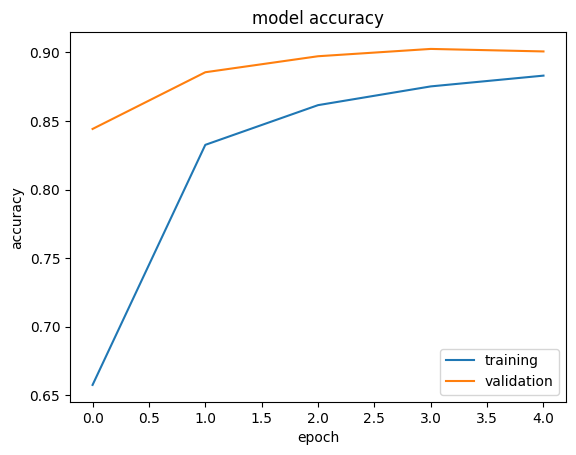


Test loss: 0.489
Test accuracy: 0.888
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


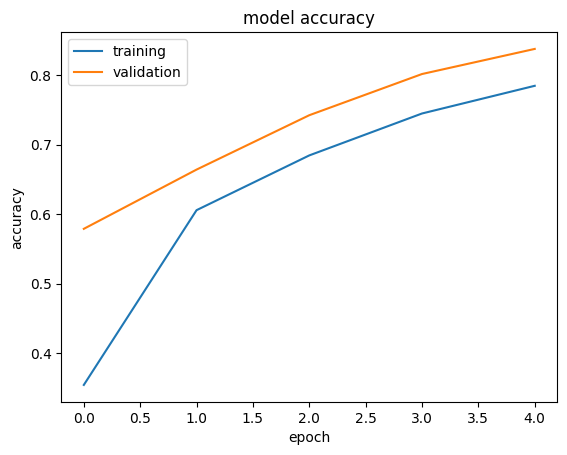


Test loss: 1.17
Test accuracy: 0.813
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                25120     
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


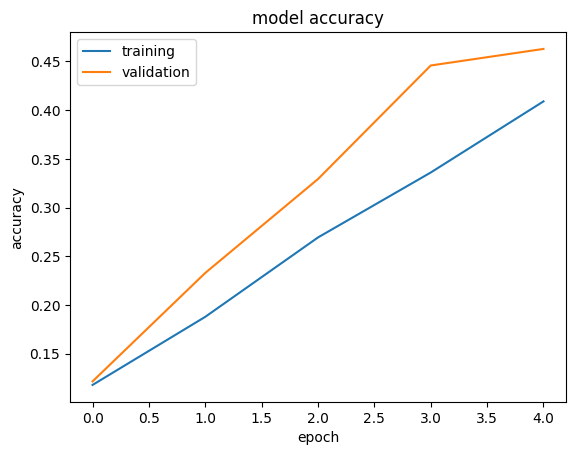


Test loss: 2.12
Test accuracy: 0.452
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                25120     
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


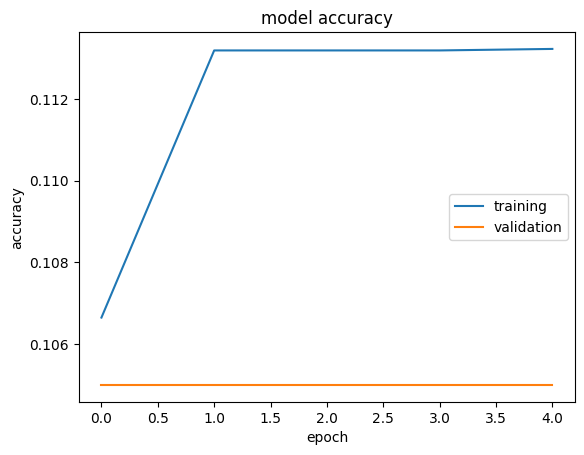


Test loss: 2.29
Test accuracy: 0.113


In [ ]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

## Deeper Networks Take Longer To Train

One of the factors at play above is that deeper networks take more time to train. This has to do with backpropogation, gradient descent, and the way optimization algorithms work -- those details are beyoned the scope of this notebook, but consider what happens when we let the 3 layer network that had mediocre performance above train for longer.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                25120     
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


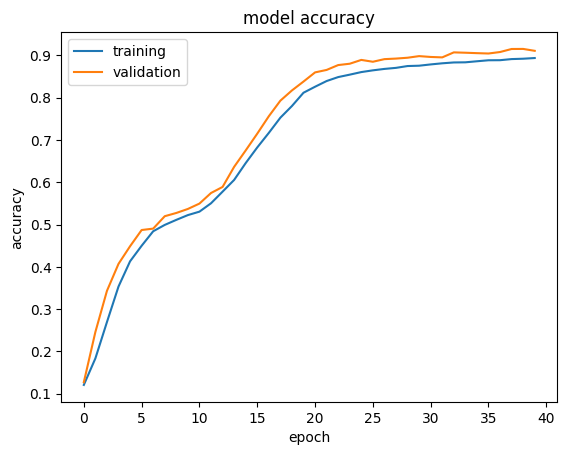


Test loss: 0.432
Test accuracy: 0.893


In [ ]:
model = create_dense([32, 32, 32])
evaluate(model, epochs=40)

10000
Random picture 1062 in testing set, which has 10000 pictures
1/1 [==============================] - 0s 157ms/step
[[9.1790473e-03 3.3613222e-04 4.5740955e-02 8.8737696e-02 4.5500505e-03
  6.0708695e-03 1.5369233e-03 6.4823014e-01 1.0789483e-01 8.7723434e-02]]
The predicted digit is 7


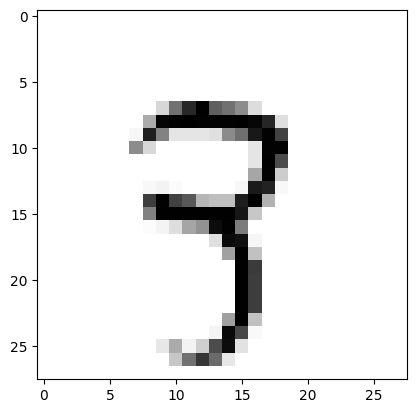

In [ ]:
import numpy as np
print(len(x_test))
k= 1062# randint(0,len(x_test))
print(f"Random picture", k, "in testing set, which has", len(x_test), "pictures" )
aaa=x_test[k:k+1,:]
plt.imshow(aaa.reshape(28,28), cmap='Greys')
a=model.predict(aaa)
print(a)
print(f"The predicted digit is", a[0,:].argmax())

## Comparing Number Of Nodes Per Layer

Another way to add complexity is to add more nodes to each hidden layer. The following code creates several single layer neural networks, with increasingly more nodes in that layer.

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                25120     
                                                                 
 dense_37 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


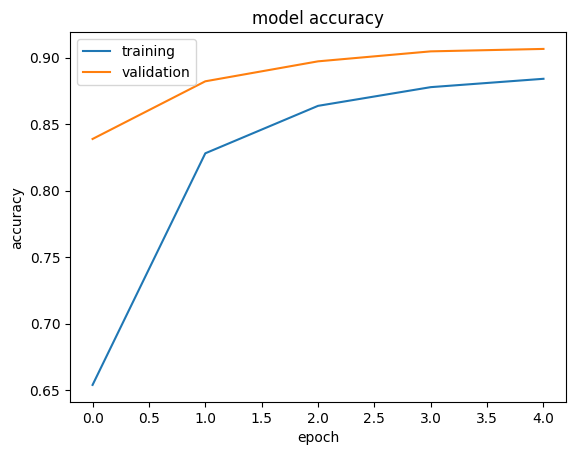


Test loss: 0.462
Test accuracy: 0.895
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                50240     
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


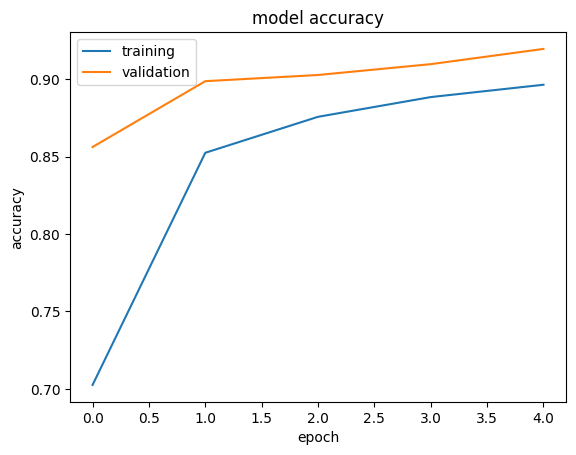


Test loss: 0.379
Test accuracy: 0.906
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dense_41 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


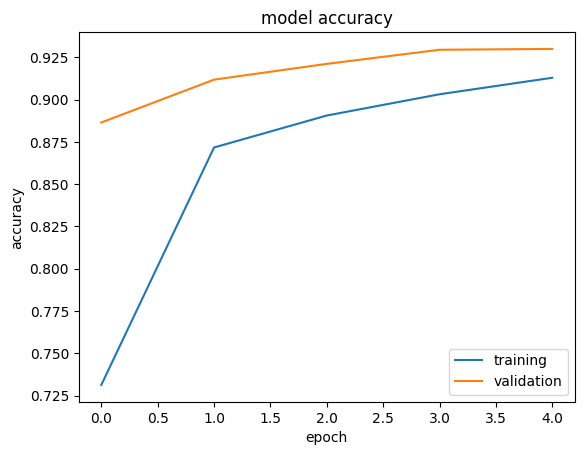


Test loss: 0.309
Test accuracy: 0.92
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               200960    
                                                                 
 dense_43 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


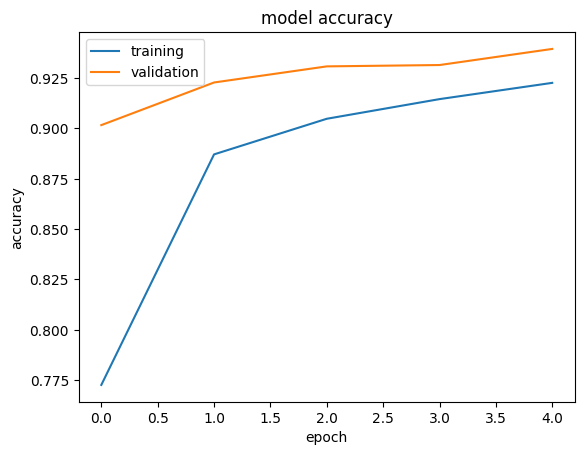


Test loss: 0.273
Test accuracy: 0.927
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


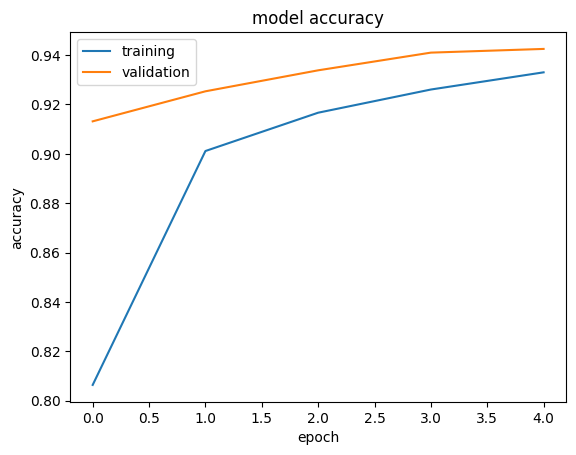


Test loss: 0.237
Test accuracy: 0.935
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 1024)              803840    
                                                                 
 dense_47 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


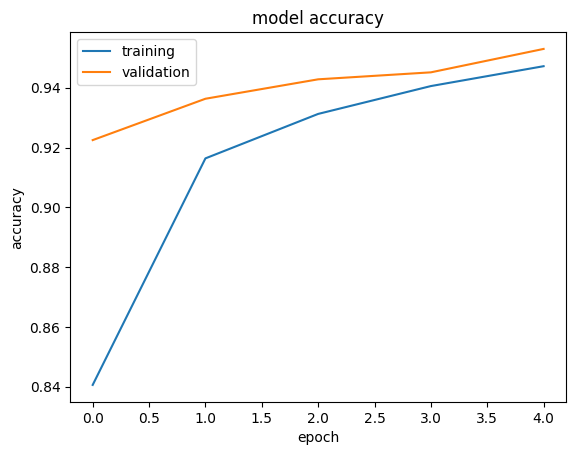


Test loss: 0.209
Test accuracy: 0.941
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_49 (Dense)            (None, 10)                20490     
                                                                 
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


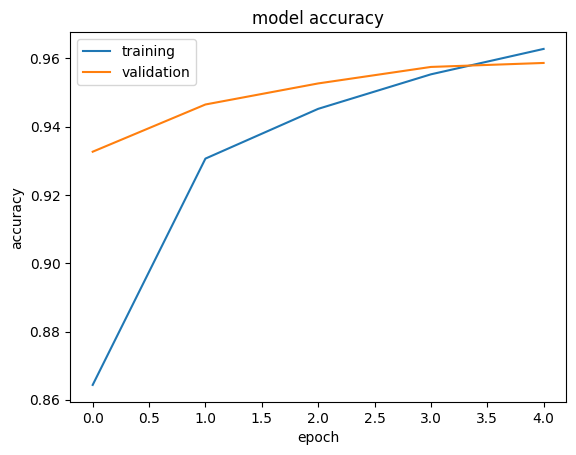


Test loss: 0.177
Test accuracy: 0.948


In [ ]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)


## More Nodes And More Layers

Now that we've looked at the number of nodes and the number of layers in an isolated context, lets look at what happens as we combine these two factors.

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 32)                25120     
                                                                 
 dense_51 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


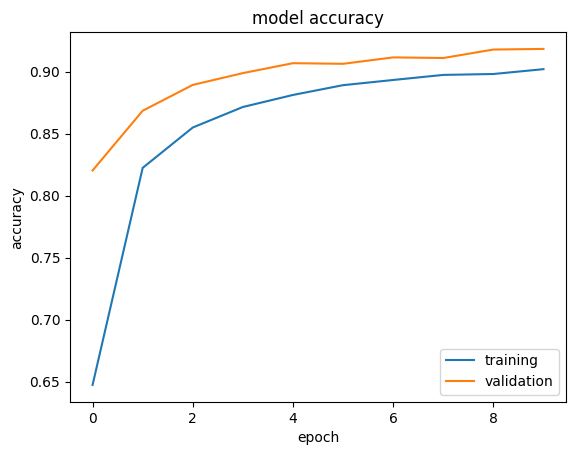


Test loss: 0.365
Test accuracy: 0.905
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                25120     
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


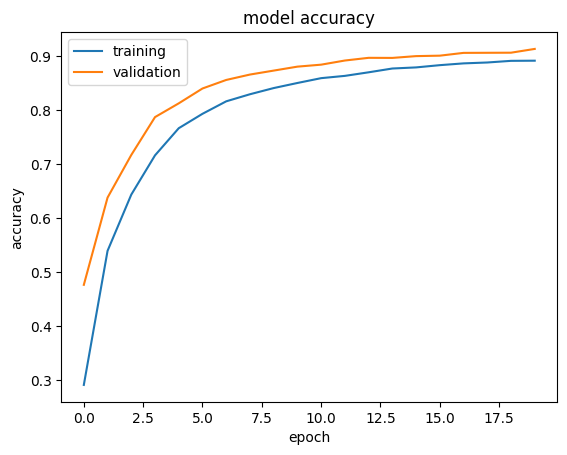


Test loss: 0.419
Test accuracy: 0.9
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 32)                25120     
                                                                 
 dense_56 (Dense)            (None, 32)                1056      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


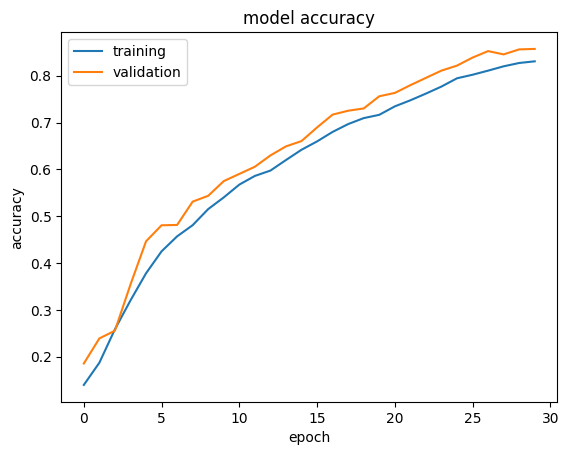


Test loss: 0.688
Test accuracy: 0.845
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                25120     
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dense_63 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


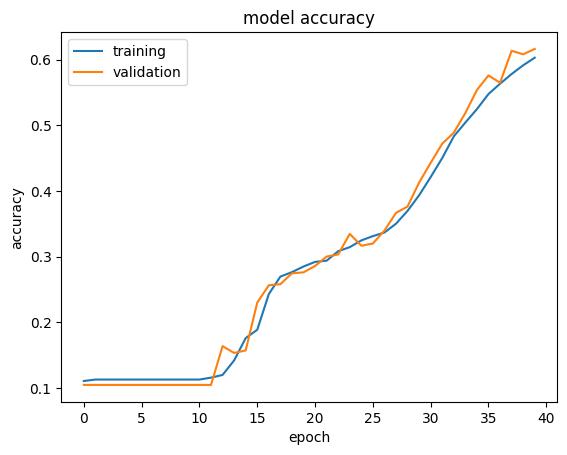


Test loss: 1.15
Test accuracy: 0.604
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 32)                25120     
                                                                 
 dense_65 (Dense)            (None, 32)                1056      
                                                                 
 dense_66 (Dense)            (None, 32)                1056      
                                                                 
 dense_67 (Dense)            (None, 32)                1056      
                                                                 
 dense_68 (Dense)            (None, 32)                1056      
                                                                 
 dense_69 (Dense)            (None, 10)                330       
                                                                 
Total params: 2

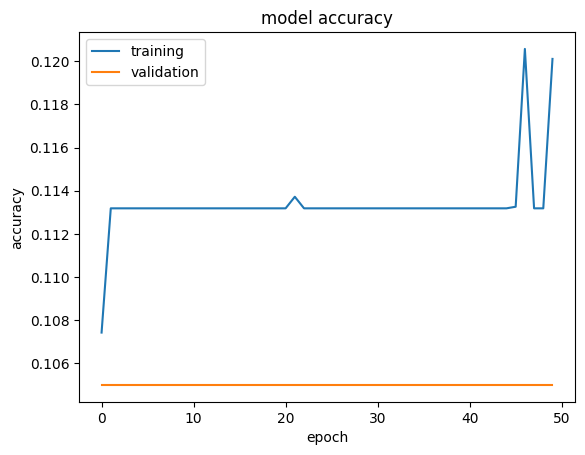


Test loss: 2.28
Test accuracy: 0.113


In [ ]:
nodes_per_layer = 32
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_269 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_270 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


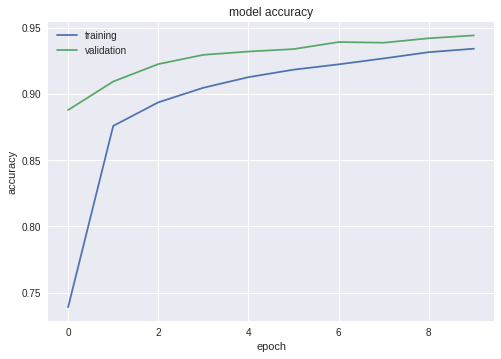


Test loss: 0.241
Test accuracy: 0.935
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_271 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_272 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_273 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


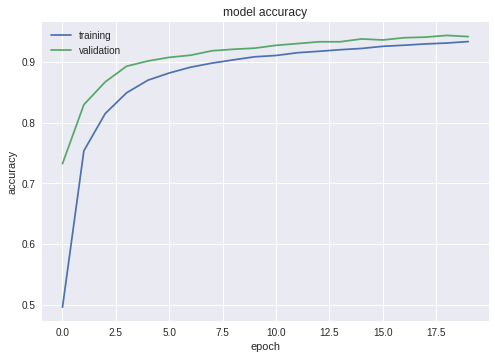


Test loss: 0.251
Test accuracy: 0.929
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_274 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_275 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_276 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_277 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


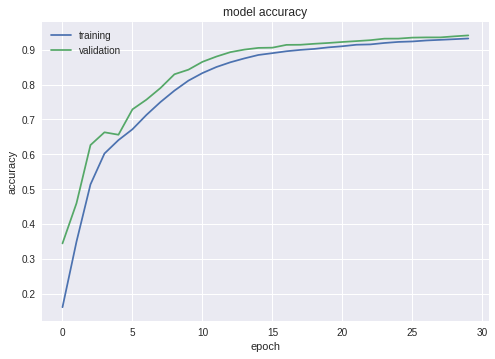


Test loss: 0.267
Test accuracy: 0.929
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_278 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_279 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_280 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_281 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_282 (Dense)            (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


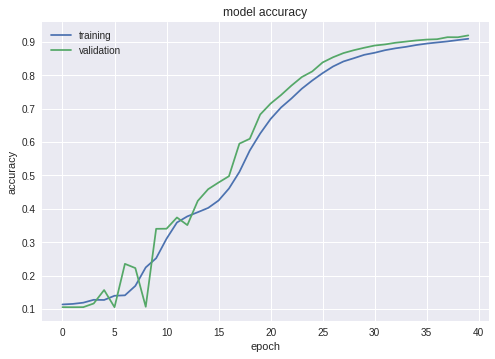


Test loss: 0.384
Test accuracy: 0.905
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_283 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_284 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_285 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_286 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_287 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_288 (Dense)            (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
_______________________________

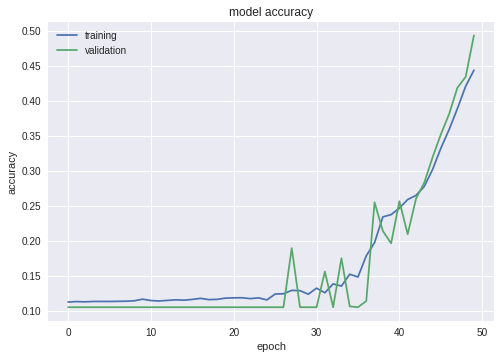


Test loss: 1.57
Test accuracy: 0.487


In [ ]:
nodes_per_layer = 128
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_290 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


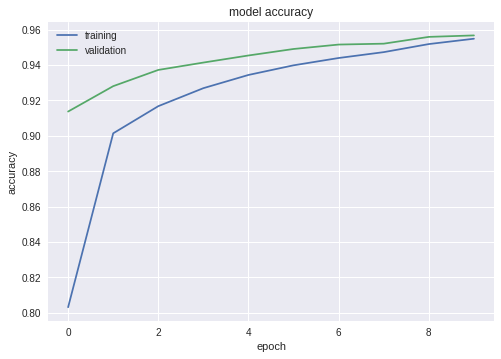


Test loss: 0.193
Test accuracy: 0.947
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_292 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_293 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


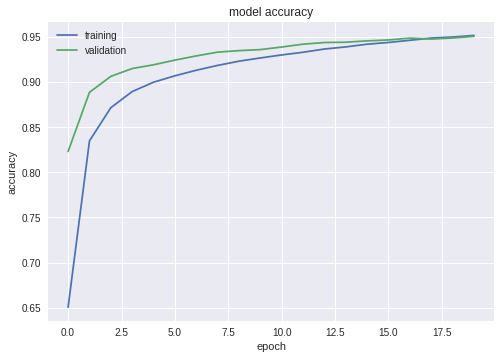


Test loss: 0.206
Test accuracy: 0.942
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_294 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_295 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_296 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_297 (Dense)            (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


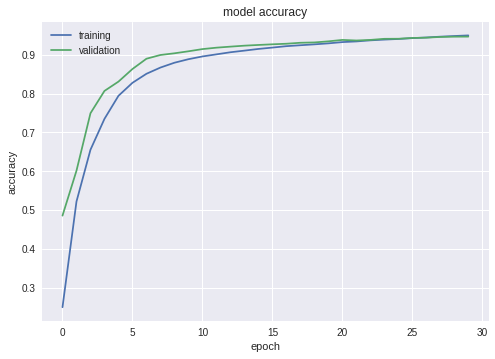


Test loss: 0.22
Test accuracy: 0.936
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_298 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_299 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_300 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_301 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_302 (Dense)            (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


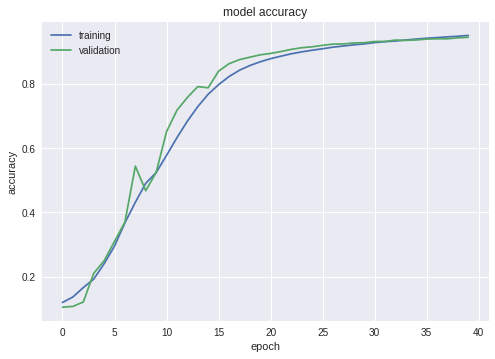


Test loss: 0.24
Test accuracy: 0.935
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_304 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_305 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_306 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_307 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_308 (Dense)            (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
____________________________

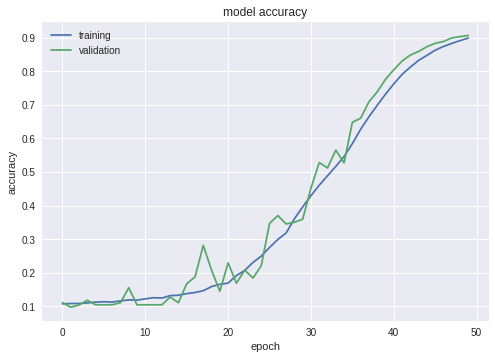


Test loss: 0.452
Test accuracy: 0.89


In [ ]:
nodes_per_layer = 512
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

## Longer Chains, More Training, Smaller Batches

Sometimes models with several layers need to not only train for longer, but also need more corrections per epoch. By decreasing the batch size, we can increase the number of overall corrections that a model gets. We also ensure it gets more fine grained information by adjusting to error over smaller batches.

In this case, we can force a model that did not learn well in previous experiments to achieve a moderately respectable 82% accuracy. The performance is still not great, but it's worth mentioning that with patience and computational power we can make a model that looked like total junk perform decently.

Still our effort would probably be better spent on more promising models.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_309 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_310 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_311 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_312 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_313 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_314 (Dense)            (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
_________________________________________________________________


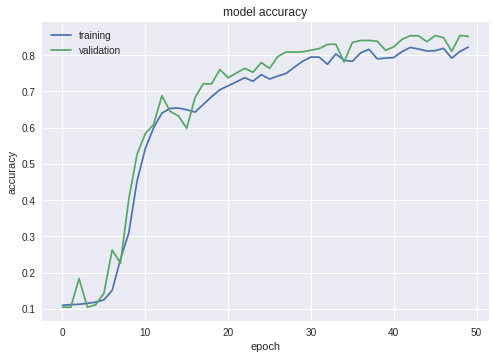


Test loss: 0.605
Test accuracy: 0.827


In [ ]:
model = create_dense([32] * 5)
evaluate(model, batch_size=16, epochs=50)